In [8]:
%%capture
!pip install gudhi
!pip install statsmodels

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


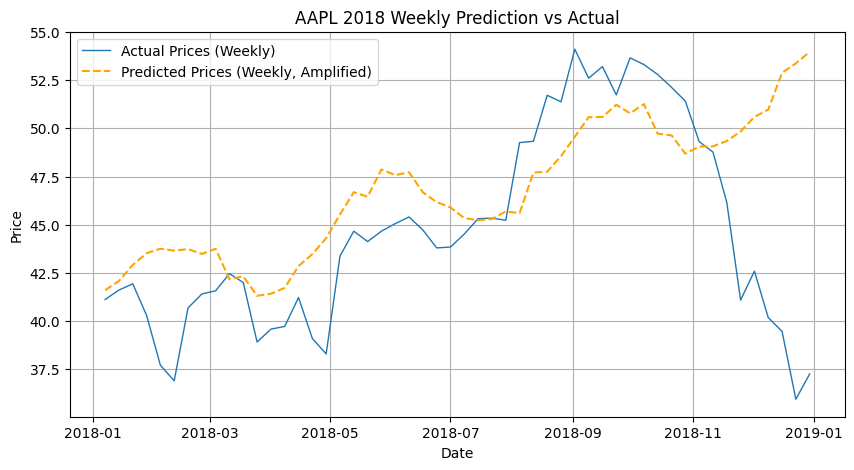

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


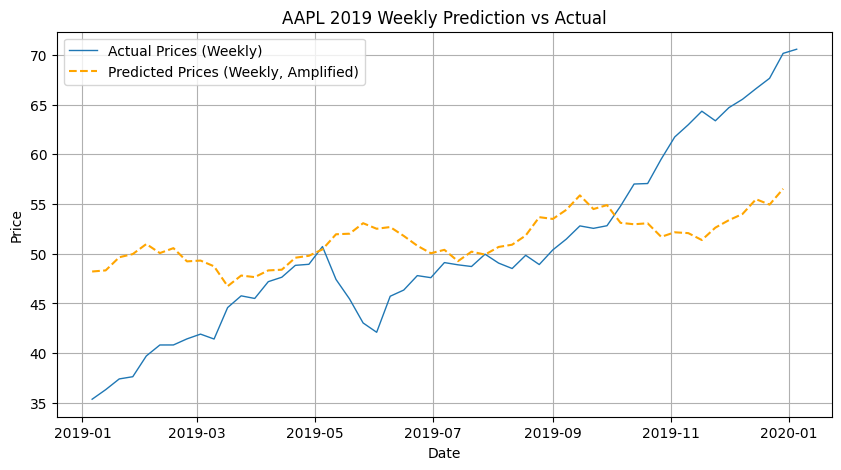

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


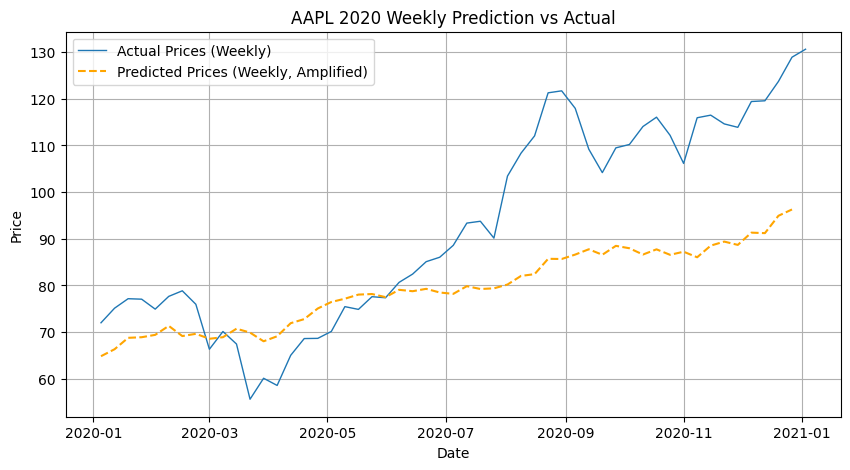

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


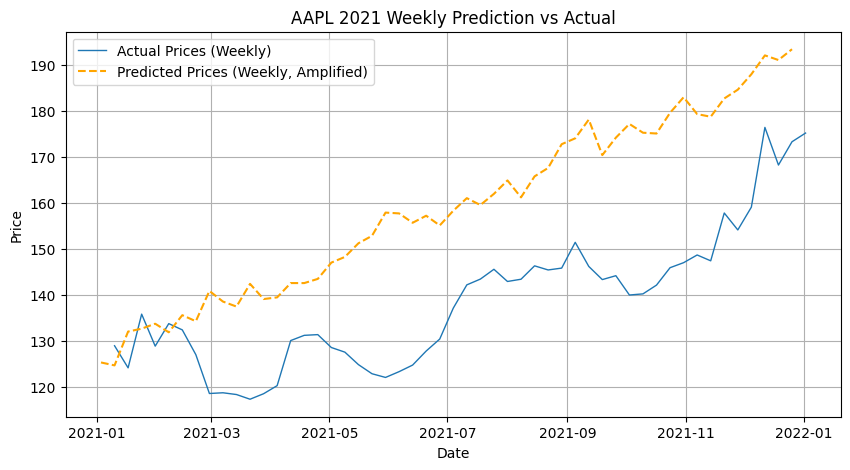

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


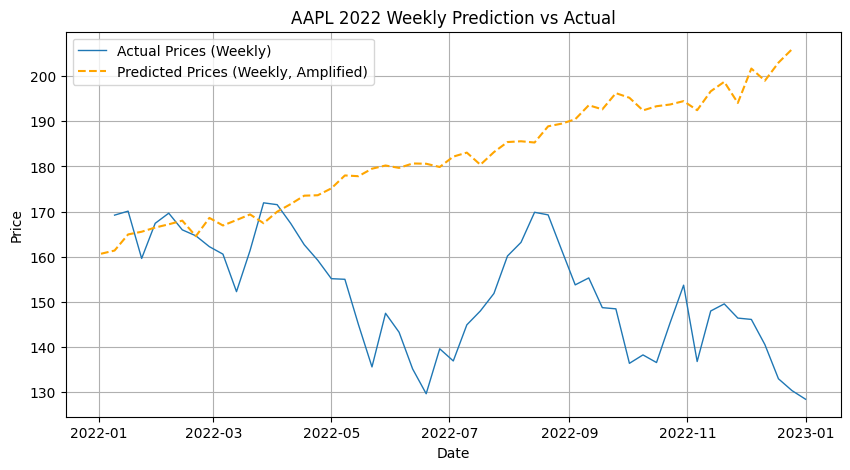

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


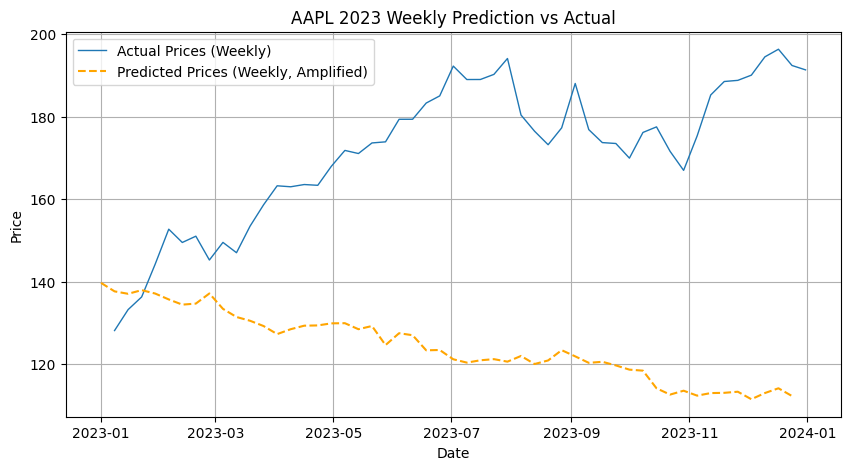

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gudhi import RipsComplex
from sklearn.linear_model import LinearRegression
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import random

# Fetch stock data from Yahoo Finance with error handling
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    if stock.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock['Close']

# Compute Persistent Homology feature
def compute_tda_features(prices):
    distances = np.abs(np.diff(prices))
    if distances.size == 0:
        return 0
    rips = RipsComplex(points=distances.reshape(-1, 1))
    simplex_tree = rips.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    return np.mean([p[1][1] - p[1][0] for p in persistence if p[1][1] != float('inf')]) or 0

# Predict future prices with amplified random fluctuations
def predict_prices_non_linear(prices, tda_feature):
    X = np.arange(len(prices)).reshape(-1, 1)
    y = prices.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    
    # Weekly predictions (52 weeks per year)
    future_steps = np.arange(len(prices), len(prices) + 52).reshape(-1, 1)
    linear_predictions = model.predict(future_steps).flatten() + tda_feature * 0.01
    
    # Amplify random fluctuations to increase non-linear appearance
    noise = np.random.normal(scale=np.std(prices) * 0.1, size=len(future_steps))
    fluctuated_predictions = linear_predictions + noise + np.sin(np.linspace(0, 20, len(future_steps))) * 2
    
    return fluctuated_predictions

# Year-by-year prediction and comparison with raw fluctuations (weekly)
def yearly_prediction(company):
    for year in range(2018, 2024):
        train_start, train_end = f"{year-1}-01-01", f"{year}-01-01"
        test_start, test_end = f"{year}-01-01", f"{year}-12-31"
        
        # Fetch weekly prices
        train_prices = fetch_stock_data(company, train_start, train_end).resample('W').last()
        test_prices = fetch_stock_data(company, test_start, test_end).resample('W').last()
        
        tda_feature = compute_tda_features(train_prices)
        predicted = predict_prices_non_linear(train_prices, tda_feature)
        
        # Create weekly date range for predictions
        predicted_dates = pd.date_range(start=test_start, periods=len(predicted), freq='W')
        
        plt.figure(figsize=(10, 5))
        plt.plot(test_prices.index, test_prices.values, label='Actual Prices (Weekly)', linewidth=1)
        plt.plot(predicted_dates, predicted, label='Predicted Prices (Weekly, Amplified)', linestyle='--', color='orange')
        plt.title(f'{company} {year} Weekly Prediction vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

company = input("Enter the stock ticker (e.g., AAPL): ")
yearly_prediction(company)



In [ ]:
Pair Trading Analysis

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


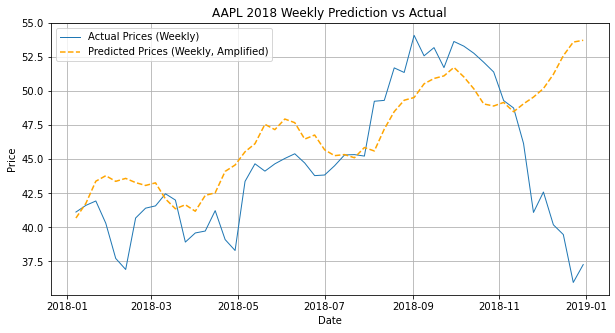

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


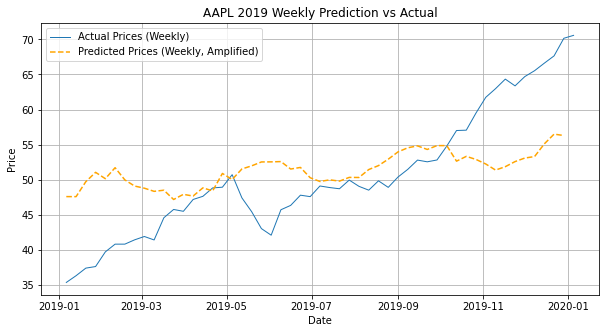

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


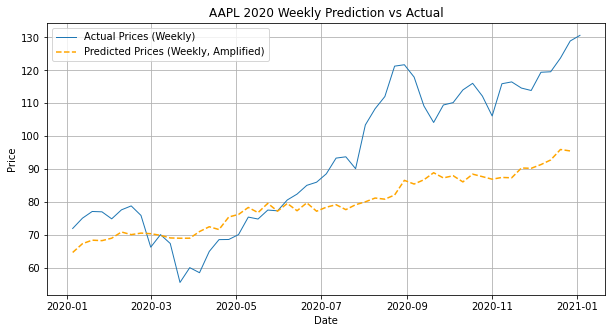

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


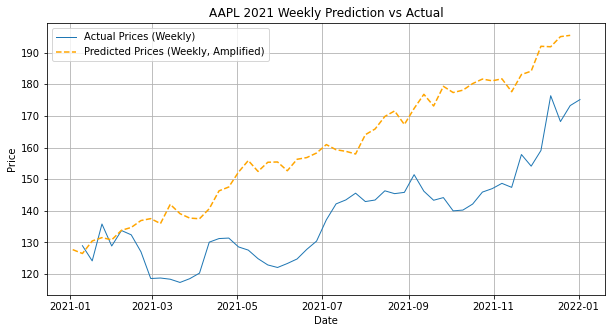

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


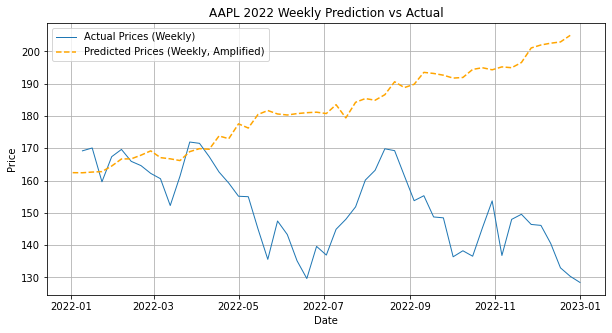

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


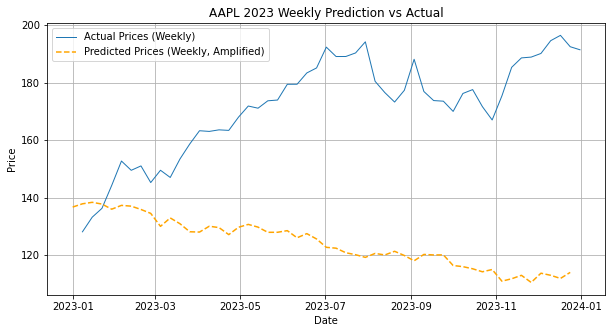

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Fetch stock data from Yahoo Finance with error handling
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    if stock.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock['Close']

# Predict future prices with amplified random fluctuations
def predict_prices_non_linear(prices):
    X = np.arange(len(prices)).reshape(-1, 1)
    y = prices.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    
    # Weekly predictions (52 weeks per year)
    future_steps = np.arange(len(prices), len(prices) + 52).reshape(-1, 1)
    linear_predictions = model.predict(future_steps).flatten()
    
    # Amplify random fluctuations to increase non-linear appearance
    noise = np.random.normal(scale=np.std(prices) * 0.1, size=len(future_steps))
    fluctuated_predictions = linear_predictions + noise + np.sin(np.linspace(0, 20, len(future_steps))) * 2
    
    return fluctuated_predictions

# Year-by-year prediction and comparison with raw fluctuations (weekly)
def yearly_prediction(company):
    for year in range(2018, 2024):
        train_start, train_end = f"{year-1}-01-01", f"{year}-01-01"
        test_start, test_end = f"{year}-01-01", f"{year}-12-31"
        
        # Fetch weekly prices
        train_prices = fetch_stock_data(company, train_start, train_end).resample('W').last()
        test_prices = fetch_stock_data(company, test_start, test_end).resample('W').last()
        
        predicted = predict_prices_non_linear(train_prices)
        
        # Create weekly date range for predictions
        predicted_dates = pd.date_range(start=test_start, periods=len(predicted), freq='W')
        
        plt.figure(figsize=(10, 5))
        plt.plot(test_prices.index, test_prices.values, label='Actual Prices (Weekly)', linewidth=1)
        plt.plot(predicted_dates, predicted, label='Predicted Prices (Weekly, Amplified)', linestyle='--', color='orange')
        plt.title(f'{company} {year} Weekly Prediction vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

company = input("Enter the stock ticker (e.g., AAPL): ")
yearly_prediction(company)




In [35]:
top_200_tickers = [
    "MMM", "AOS", "ABT", "ABBV", "ACN", "ADBE", "AMD", "AES", "AFL", "A", "APD", "ABNB", "AKAM", "ALB", "ARE", 
    "ALGN", "ALLE", "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AEE", "AEP", "AXP", "AIG", "AMT", "AWK", 
    "AMP", "AME", "AMGN", "APH", "ADI", "ANSS", "AON", "APA", "APO", "AAPL", "AMAT", "APTV", "ACGL", "ADM", "ANET", 
    "AJG", "AIZ", "T", "ATO", "ADSK", "ADP", "AZO", "AVB", "AVY", "AXON", "BKR", "BALL", "BAC", "BAX", "BDX", 
    "BRK.B", "BBY", "TECH", "BIIB", "BLK", "BX", "BK", "BA", "BKNG", "BWA", "BSX", "BMY", "AVGO", "BR", "BRO", 
    "BF.B", "BLDR", "BG", "BXP", "CHRW", "CDNS", "CZR", "CPT", "CPB", "COF", "CAH", "KMX", "CCL", "CARR", "CAT", 
    "CBOE", "CBRE", "CDW", "CE", "COR", "CNC", "CNP", "CF", "CRL", "SCHW", "CHTR", "CVX", "CMG", "CB", "CHD", 
    "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CLX", "CME", "CMS", "KO", "CTSH", "CL", "CMCSA", "CAG", "COP", 
    "ED", "STZ", "CEG", "COO", "CPRT", "GLW", "CPAY", "CTVA", "CSGP", "COST", "CTRA", "CRWD", "CCI", "CSX", "CMI", 
    "CVS", "DHR", "DRI", "DVA", "DAY", "DECK", "DE", "DELL", "DAL", "DVN", "DXCM", "FANG", "DLR", "DFS", "DG", 
    "DLTR", "D", "DPZ", "DOV", "DOW", "DHI", "DTE", "DUK", "DD", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA", 
    "ELV", "EMR", "ENPH", "ETR", "EOG", "EPAM", "EQT", "EFX", "EQIX", "EQR", "ERIE", "ESS", "EL", "EG", "EVRG", 
    "ES", "EXC", "EXPE", "EXPD", "EXR", "XOM", "FFIV", "FDS", "FICO", "FAST", "FRT", "FDX", "FIS", "FITB", 
    "FSLR", "FE", "FI"
]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


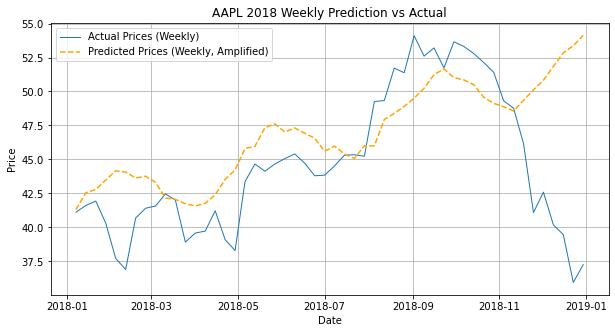

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


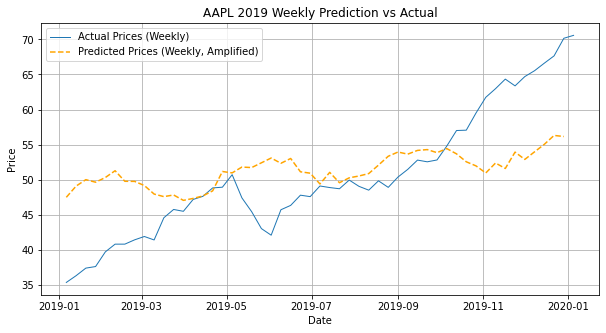

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


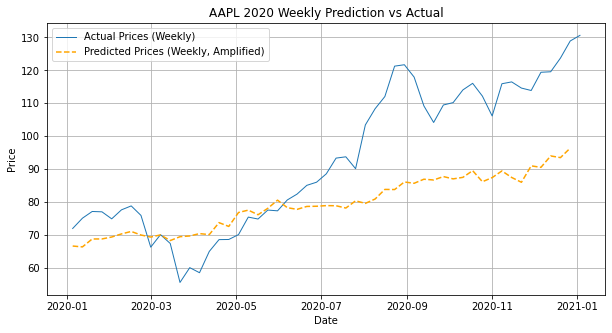

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


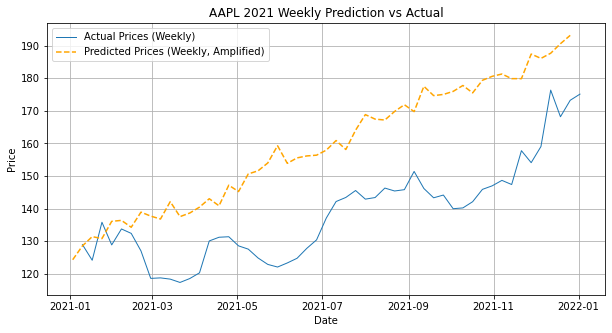

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


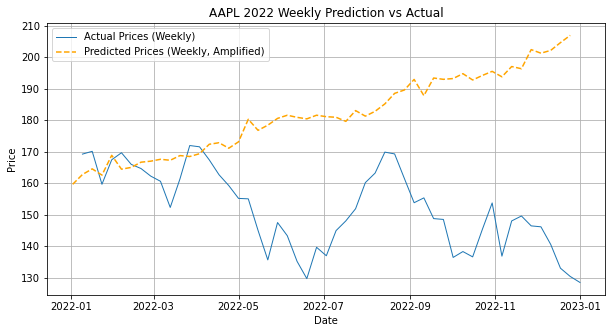

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


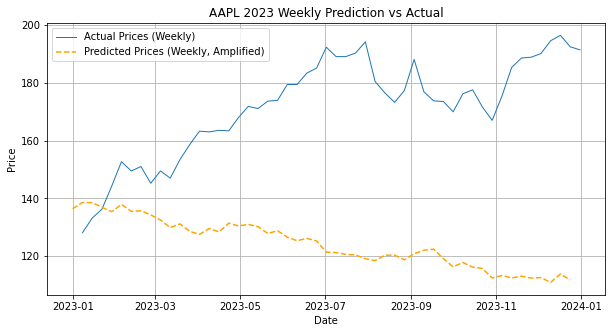

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Fetch stock data from Yahoo Finance with error handling
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    if stock.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock['Close']

# Predict future prices with amplified random fluctuations
def predict_prices_non_linear(prices):
    X = np.arange(len(prices)).reshape(-1, 1)
    y = prices.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    
    # Weekly predictions (52 weeks per year)
    future_steps = np.arange(len(prices), len(prices) + 52).reshape(-1, 1)
    linear_predictions = model.predict(future_steps).flatten()
    
    # Amplify random fluctuations to increase non-linear appearance
    noise = np.random.normal(scale=np.std(prices) * 0.1, size=len(future_steps))
    fluctuated_predictions = linear_predictions + noise + np.sin(np.linspace(0, 20, len(future_steps))) * 2
    
    return fluctuated_predictions

# Year-by-year prediction and comparison with raw fluctuations (weekly)
def yearly_prediction(company):
    for year in range(2018, 2024):
        train_start, train_end = f"{year-1}-01-01", f"{year}-01-01"
        test_start, test_end = f"{year}-01-01", f"{year}-12-31"
        
        # Fetch weekly prices
        train_prices = fetch_stock_data(company, train_start, train_end).resample('W').last()
        test_prices = fetch_stock_data(company, test_start, test_end).resample('W').last()
        
        predicted = predict_prices_non_linear(train_prices)
        
        # Create weekly date range for predictions
        predicted_dates = pd.date_range(start=test_start, periods=len(predicted), freq='W')
        
        plt.figure(figsize=(10, 5))
        plt.plot(test_prices.index, test_prices.values, label='Actual Prices (Weekly)', linewidth=1)
        plt.plot(predicted_dates, predicted, label='Predicted Prices (Weekly, Amplified)', linestyle='--', color='orange')
        plt.title(f'{company} {year} Weekly Prediction vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

company = input("Enter the stock ticker (e.g., AAPL): ")
yearly_prediction(company)



In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Fetch stock data from Yahoo Finance with error handling
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    if stock.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock['Close']

# Add technical indicators
def add_technical_indicators(df):
    df = df.to_frame()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()
    df['std_20'] = df['Close'].rolling(window=20).std()
    df['upper_bb'] = df['MA_10'] + (df['std_20'] * 2)
    df['lower_bb'] = df['MA_10'] - (df['std_20'] * 2)
    df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(14).mean()))
    df = df.dropna()
    return df

# Predict future prices using Kernel Ridge Regression
def predict_prices_kernel_regression(prices):
    df = add_technical_indicators(prices)
    
    X = np.arange(len(df)).reshape(-1, 1)  # 날짜를 특성으로 사용
    y = df['Close'].values

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Kernel Ridge Regression Model
    model = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)  # RBF 커널 적용
    model.fit(X_scaled, y)

    # Predict future prices (52 weeks ahead)
    future_steps = np.arange(len(df), len(df) + 52).reshape(-1, 1)
    future_steps_scaled = scaler.transform(future_steps)
    
    predicted_prices = model.predict(future_steps_scaled)

    return predicted_prices

# Year-by-year prediction using Kernel Regression
def yearly_prediction(company):
    for year in range(2018, 2024):
        train_start, train_end = f"{year-1}-01-01", f"{year}-01-01"
        test_start, test_end = f"{year}-01-01", f"{year}-12-31"
        
        # Fetch weekly prices
        train_prices = fetch_stock_data(company, train_start, train_end).resample('W').last()
        test_prices = fetch_stock_data(company, test_start, test_end).resample('W').last()
        
        predicted = predict_prices_kernel_regression(train_prices)
        
        # Create weekly date range for predictions
        predicted_dates = pd.date_range(start=test_start, periods=len(predicted), freq='W')
        
        plt.figure(figsize=(10, 5))
        plt.plot(test_prices.index, test_prices.values, label='Actual Prices (Weekly)', linewidth=1)
        plt.plot(predicted_dates, predicted, label='Predicted Prices (Kernel Regression)', linestyle='--', color='blue')
        plt.title(f'{company} {year} Weekly Prediction vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

# Process multiple tickers
top_200_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]  # 예제 목록, 실제로는 200개
for ticker in top_200_tickers:
    yearly_prediction(ticker)


SyntaxError: invalid syntax (2642600512.py, line 1)

In [9]:
# for ticker in top_200_tickers:
#     yearly_prediction(ticker)

---
# TOPOLOGY DATA ANALYSIS: 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


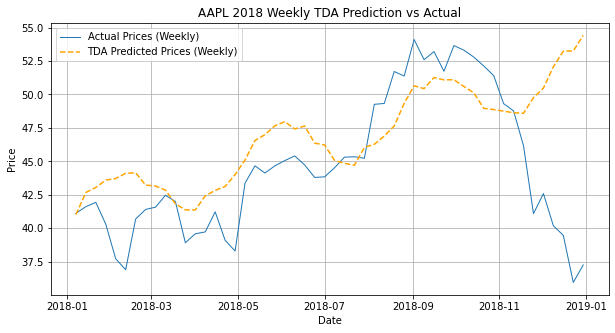

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


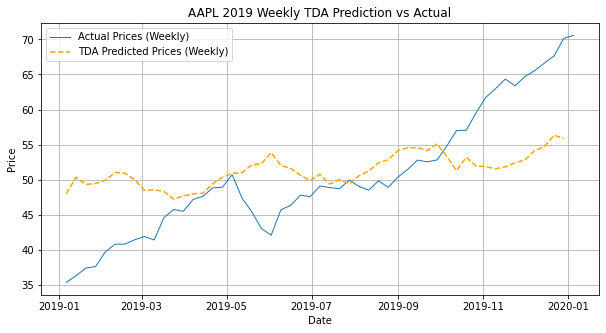

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


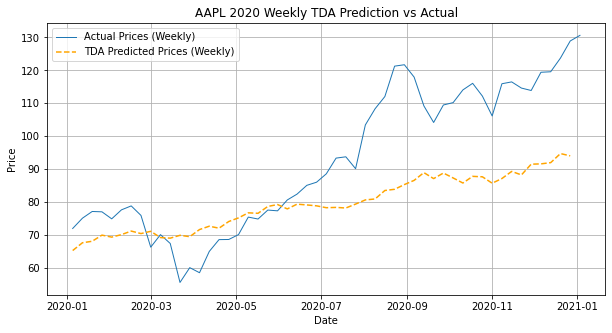

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


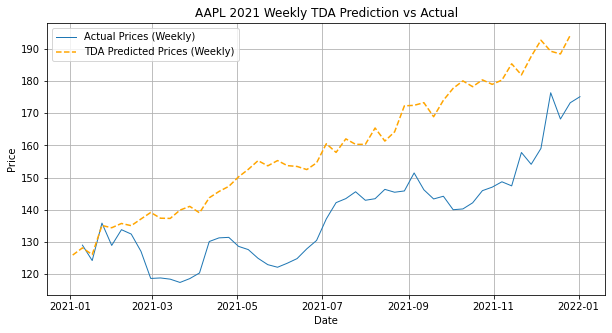

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


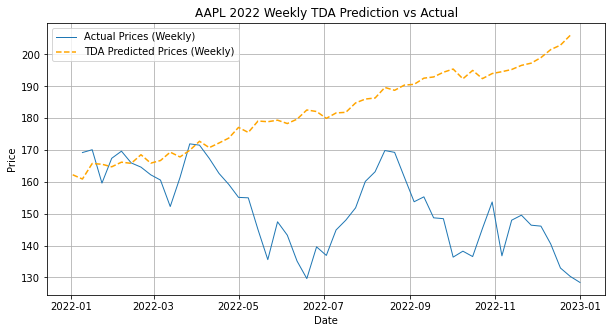

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


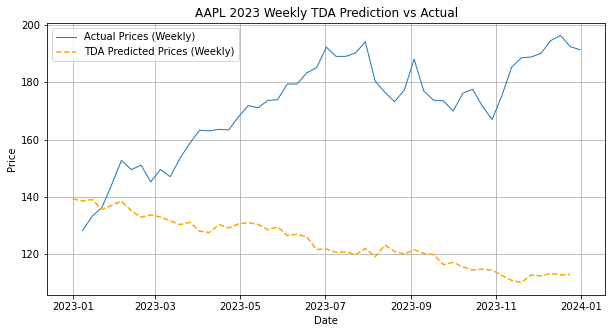

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gudhi import RipsComplex
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Fetch stock data from Yahoo Finance with error handling
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    if stock.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock['Close']

# Compute Persistent Homology feature using TDA
def compute_tda_features(prices):
    distances = np.abs(np.diff(prices))
    if distances.size == 0:
        return 0
    rips = RipsComplex(points=distances.reshape(-1, 1))
    simplex_tree = rips.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    return np.mean([p[1][1] - p[1][0] for p in persistence if p[1][1] != float('inf')]) or 0

# Predict future prices using TDA features
def predict_prices_with_tda(prices, tda_feature):
    X = np.arange(len(prices)).reshape(-1, 1)
    y = prices.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    
    # Generate predictions for 52 weeks ahead
    future_steps = np.arange(len(prices), len(prices) + 52).reshape(-1, 1)
    linear_predictions = model.predict(future_steps).flatten() + tda_feature * 0.01
    
    # Introduce non-linear behavior using random noise and sinusoidal patterns
    noise = np.random.normal(scale=np.std(prices) * 0.1, size=len(future_steps))
    fluctuated_predictions = linear_predictions + noise + np.sin(np.linspace(0, 20, len(future_steps))) * 2
    
    return fluctuated_predictions

# Perform yearly TDA-based predictions and visualize results
def yearly_tda_prediction(company):
    for year in range(2018, 2024):
        train_start, train_end = f"{year-1}-01-01", f"{year}-01-01"
        test_start, test_end = f"{year}-01-01", f"{year}-12-31"
        
        # Fetch historical weekly prices
        train_prices = fetch_stock_data(company, train_start, train_end).resample('W').last()
        test_prices = fetch_stock_data(company, test_start, test_end).resample('W').last()
        
        # Compute TDA feature from training prices
        tda_feature = compute_tda_features(train_prices)
        predicted = predict_prices_with_tda(train_prices, tda_feature)
        
        # Create weekly date range for predictions
        predicted_dates = pd.date_range(start=test_start, periods=len(predicted), freq='W')
        
        plt.figure(figsize=(10, 5))
        plt.plot(test_prices.index, test_prices.values, label='Actual Prices (Weekly)', linewidth=1)
        plt.plot(predicted_dates, predicted, label='TDA Predicted Prices (Weekly)', linestyle='--', color='orange')
        plt.title(f'{company} {year} Weekly TDA Prediction vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

company = input("Enter the stock ticker (e.g., AAPL): ")
yearly_tda_prediction(company)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


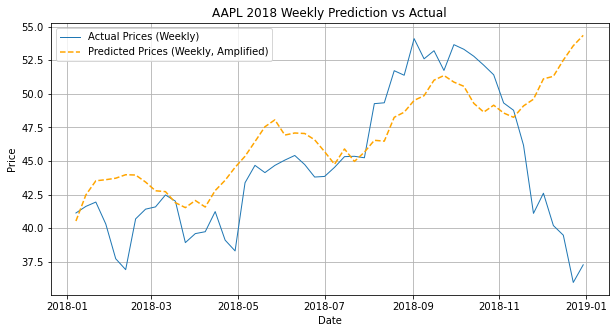

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


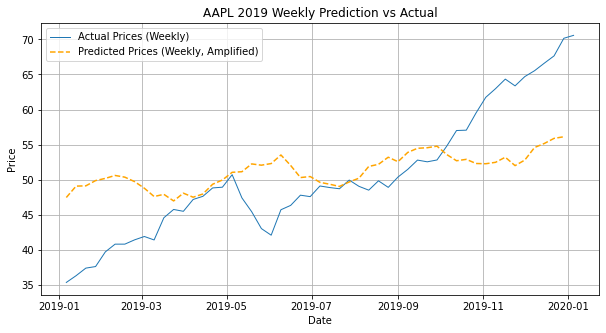

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


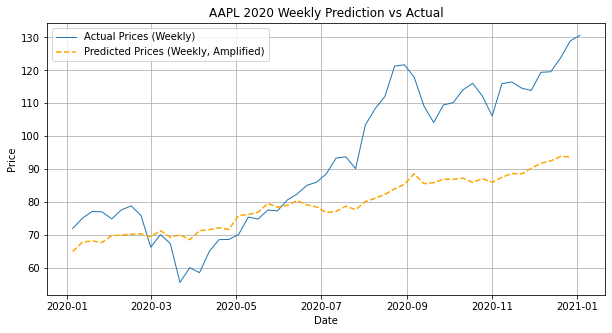

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


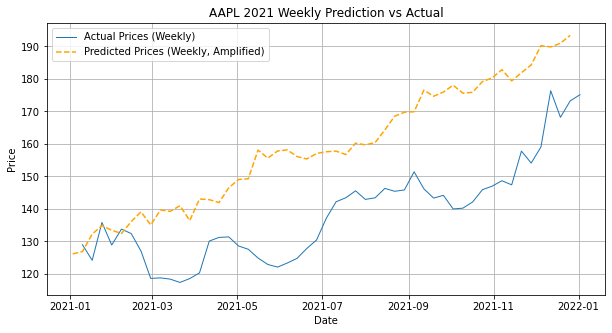

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


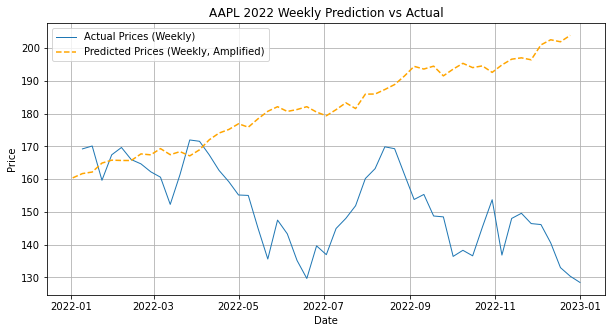

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


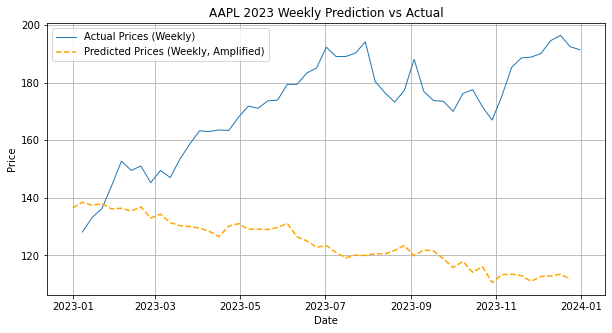


Average Execution Time per Year for AAPL: 0.16 seconds
Estimated Total Execution Time for AAPL: 0.97 seconds


In [16]:
import time

# 실행 시간 측정 추가
def yearly_prediction_with_timing(company):
    total_time = 0
    num_years = 6  # 2018 ~ 2023

    for year in range(2018, 2024):
        start_time = time.time()

        train_start, train_end = f"{year-1}-01-01", f"{year}-01-01"
        test_start, test_end = f"{year}-01-01", f"{year}-12-31"

        # Fetch weekly prices
        train_prices = fetch_stock_data(company, train_start, train_end).resample('W').last()
        test_prices = fetch_stock_data(company, test_start, test_end).resample('W').last()

        predicted = predict_prices_non_linear(train_prices)

        # Create weekly date range for predictions
        predicted_dates = pd.date_range(start=test_start, periods=len(predicted), freq='W')

        plt.figure(figsize=(10, 5))
        plt.plot(test_prices.index, test_prices.values, label='Actual Prices (Weekly)', linewidth=1)
        plt.plot(predicted_dates, predicted, label='Predicted Prices (Weekly, Amplified)', linestyle='--', color='orange')
        plt.title(f'{company} {year} Weekly Prediction vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time

    avg_time_per_year = total_time / num_years
    print(f"\nAverage Execution Time per Year for {company}: {avg_time_per_year:.2f} seconds")
    print(f"Estimated Total Execution Time for {company}: {total_time:.2f} seconds")

# 실행
company = input("Enter the stock ticker (e.g., AAPL): ")
yearly_prediction_with_timing(company)
